In [1]:
MAX_LENGTH = 10

In [2]:
from data_util import prepare_data

input_lang, output_lang, train_pairs, test_pairs = prepare_data('lang1', 'lang2', MAX_LENGTH, 2, True)

['tr_data/europarl-v7.fr-en.en', 'tr_data/europarl-v7.fr-en.fr']
Reading lines...
Read 88591 sentence pairs
Trimmed to 21860 sentence pairs
Indexing words...
Spliting sentence pairs...
====== Total Data ======
Train Sentence pairs:  17488
Test Sentence pairs:  4372
lang1 n_words:  11444 max_len:  9
lang2 n_words:  8849 max_len:  9


In [3]:
from models_complete import EncoderRNN, AttnDecoderRNN

hidden_size = 256
encoder1 = EncoderRNN(input_lang.n_words, hidden_size)
attn_decoder1 = AttnDecoderRNN(hidden_size, output_lang.n_words,
                               MAX_LENGTH, dropout_p=0.1)

In [4]:
from train_complete import train_iters

plot_losses = train_iters(encoder1, attn_decoder1, input_lang, 
            output_lang, train_pairs[:50], 1000, MAX_LENGTH)

0m 13s (- 1m 59s) (100 10%) 5.1189
0m 28s (- 1m 52s) (200 20%) 4.7453
0m 43s (- 1m 40s) (300 30%) 4.2459
0m 58s (- 1m 27s) (400 40%) 3.8996
1m 13s (- 1m 13s) (500 50%) 3.5342
1m 28s (- 0m 59s) (600 60%) 3.4777
1m 44s (- 0m 44s) (700 70%) 3.2370
1m 59s (- 0m 29s) (800 80%) 2.8356
2m 15s (- 0m 15s) (900 90%) 2.4696
2m 30s (- 0m 0s) (1000 100%) 2.1433


In [5]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
%matplotlib inline

def showPlot(points):
    plt.figure()
    fig, ax = plt.subplots()
    # this locator puts ticks at regular intervals
    loc = ticker.MultipleLocator(base=0.2)
    ax.yaxis.set_major_locator(loc)
    plt.plot(points)

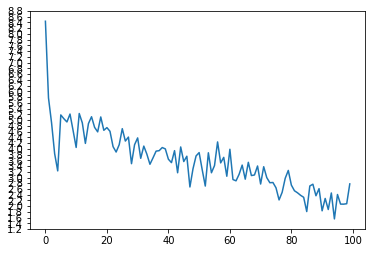

In [6]:
showPlot(plot_losses)

In [7]:
from predict import ModelPredictor

predictor = ModelPredictor(encoder1, attn_decoder1, input_lang, output_lang, MAX_LENGTH)
predictor.evaluate_randomly(train_pairs[:10])
predictor.predict_sentence("je comprends il est essentiel .")

> nous savons tous ce qu endurent ces prisonniers .
= we all know what those prisoners are suffering .
< we can do more more helping those .

> je voudrais en mentionner trois en particulier .
= i would like to refer to three in particular .
< i would like to refer to be .

> mais nous avons aussi une part de responsabilite .
= we also have our share of responsibility however .
< we are do more more of for .

> je voudrais en mentionner trois en particulier .
= i would like to refer to three in particular .
< i would like to refer to be .

> moi je voudrais vous faire une proposition .
= personally i would like to make a suggestion .
< i would like like to refer a very .

> on est contraint d en prendre acte .
= we are forced to take note of it .
< we are forced to take it a .

> on est contraint d en prendre acte .
= we are forced to take note of it .
< we are forced to take note of it .

> mais nous avons aussi une part de responsabilite .
= we also have our share of responsibility h

'the vote will take place tomorrow at a .'